In [ ]:
# Data Profiling Techniques Examples

# 1. Descriptive Statistics:
# Task 1: Calculate the mean, median, and mode for sales figures in a retail dataset.
# Task 2: Analyze the average age, median, and mode in a customer demographic
# dataset.
# Task 3: Determine the mean, median, and mode of daily website visit counts.






# 2. Distribution Analysis:
# Task 1: Visualize the distribution of product prices using histograms.
# Task 2: Create a distribution chart for exam scores in an educational dataset.
# Task 3: Analyze the distribution of order quantities for inventory management.






# 3. Data Type Validation:
# Task 1: Validate numeric fields in a dataset to ensure they contain only numbers.
# Task 2: Check for valid date formats in a transaction log.
# Task 3: Validate email formats in a customer contact dataset.









Retail Sales - Mean: 167.85714285714286
Retail Sales - Median: 175.0
Retail Sales - Mode: [200]

Customer Ages - Mean: 28.857142857142858
Customer Ages - Median: 30.0
Customer Ages - Mode: [30]

Daily Visits - Mean: 1164.2857142857142
Daily Visits - Median: 1200.0
Daily Visits - Mode: [1100, 1200]


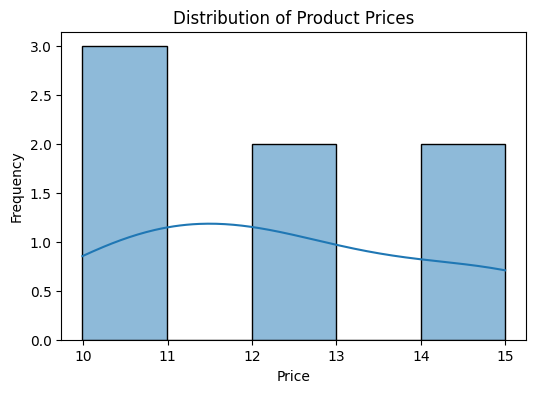

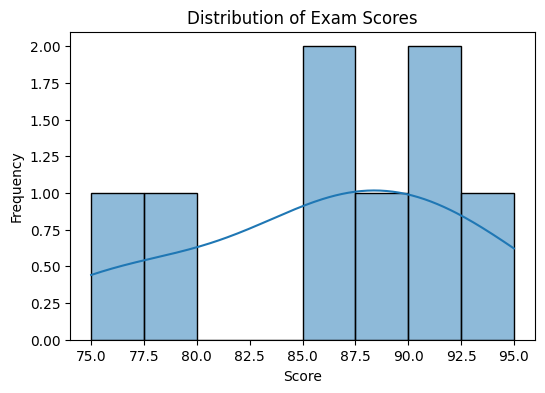

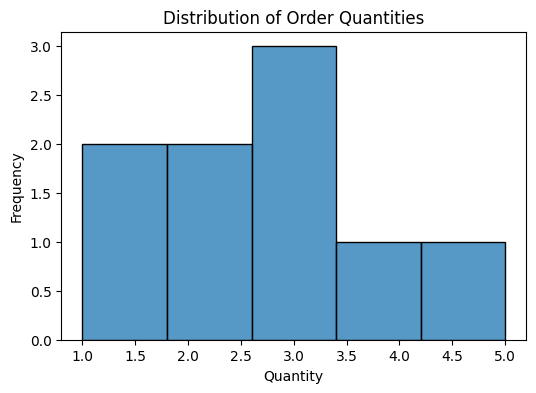


Validating numeric field:
Invalid numeric values found: ['forty']

Validating date formats (YYYY-MM-DD):
All dates are valid.

Validating email formats:
Invalid emails found: ['bob@example', 'dave@.com']


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# ----------------------------------------
# 1. Descriptive Statistics Examples
# ----------------------------------------

# Task 1: Retail sales figures
retail_sales = pd.Series([100, 150, 200, 150, 175, 200, 200])
print("Retail Sales - Mean:", retail_sales.mean())
print("Retail Sales - Median:", retail_sales.median())
print("Retail Sales - Mode:", retail_sales.mode().tolist())

# Task 2: Customer demographics (age)
customer_ages = pd.Series([25, 30, 22, 30, 40, 25, 30])
print("\nCustomer Ages - Mean:", customer_ages.mean())
print("Customer Ages - Median:", customer_ages.median())
print("Customer Ages - Mode:", customer_ages.mode().tolist())

# Task 3: Daily website visits
daily_visits = pd.Series([1000, 1200, 1100, 1300, 1250, 1100, 1200])
print("\nDaily Visits - Mean:", daily_visits.mean())
print("Daily Visits - Median:", daily_visits.median())
print("Daily Visits - Mode:", daily_visits.mode().tolist())

# ----------------------------------------
# 2. Distribution Analysis Examples
# ----------------------------------------

# Task 1: Product prices histogram
product_prices = pd.Series([10.99, 12.50, 9.99, 14.99, 10.99, 15.00, 12.50])
plt.figure(figsize=(6,4))
sns.histplot(product_prices, bins=5, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Task 2: Exam scores distribution
exam_scores = pd.Series([88, 92, 75, 85, 90, 95, 78, 85])
plt.figure(figsize=(6,4))
sns.histplot(exam_scores, bins=8, kde=True)
plt.title("Distribution of Exam Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Task 3: Order quantities distribution
order_quantities = pd.Series([1, 3, 2, 5, 3, 2, 4, 1, 3])
plt.figure(figsize=(6,4))
sns.histplot(order_quantities, bins=5, kde=False)
plt.title("Distribution of Order Quantities")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

# ----------------------------------------
# 3. Data Type Validation Examples
# ----------------------------------------

# Task 1: Validate numeric fields
def validate_numeric(series):
    # Check if all values can be converted to numeric
    coerced = pd.to_numeric(series, errors='coerce')
    invalid = coerced.isnull() & ~series.isnull()
    if invalid.any():
        print(f"Invalid numeric values found: {series[invalid].tolist()}")
    else:
        print("All values are valid numerics.")

numeric_field = pd.Series(['10', '20', '30', 'forty', '50'])
print("\nValidating numeric field:")
validate_numeric(numeric_field)

# Task 2: Validate date formats
def validate_dates(series, date_format='%Y-%m-%d'):
    # Attempt to parse dates with the specified format
    valid = series.apply(lambda x: bool(pd.to_datetime(x, format=date_format, errors='coerce')))
    if not valid.all():
        print(f"Invalid dates found: {series[~valid].tolist()}")
    else:
        print("All dates are valid.")

transaction_dates = pd.Series(['2025-01-10', '2025-02-15', '15/03/2025', '2025-04-01'])
print("\nValidating date formats (YYYY-MM-DD):")
validate_dates(transaction_dates)

# Task 3: Validate email formats
def validate_emails(series):
    email_regex = r'^[\w\.-]+@[\w\.-]+\.\w+$'
    invalid = series[~series.str.match(email_regex, na=False)]
    if not invalid.empty:
        print(f"Invalid emails found: {invalid.tolist()}")
    else:
        print("All emails are valid.")

customer_emails = pd.Series(['alice@example.com', 'bob@example', 'charlie@example.com', 'dave@.com'])
print("\nValidating email formats:")
validate_emails(customer_emails)


=== Example: Missing Data Handling ===
Missing values before handling:
email    1
age      1
dtype: int64
Missing values after handling:
email    1
age      0
dtype: int64

=== Example: Duplicate Removal ===
Number of duplicate rows: 1
   id     name
0   1    Alice
1   2      Bob
3   3  Charlie

=== Example: Date Standardization ===
        date
0 2025-01-01
1        NaT
2        NaT
3        NaT

=== Example: Phone Number Normalization ===
0     1234567890
1     1234567890
2    11234567890
dtype: object

=== Example: State Abbreviation Standardization ===
0    123 St, Los Angeles, CA.
1       456 St, San Diego, CA
dtype: object

=== Example: Data Drift Detection ===

Data Drift Analysis for 'FeatureX':
Old Mean: 50.085, New Mean: 52.138
KS Statistic: 0.180, P-value: 0.00000
Drift Detected.


/tmp/ipykernel_40460/456078144.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_40460/456078144.py:70: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_col] = pd.to_datetime(df[date_col], infer_datetime_format=True, errors='coerce')
/tmp/ipyk

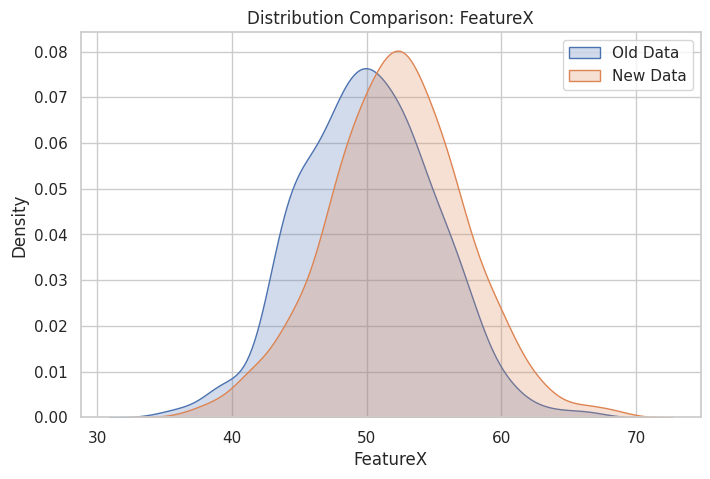


=== Example: Descriptive Statistics ===
Sales - Mean: 155.0, Median: 150.0, Mode: [150]

=== Example: Distribution Plot ===


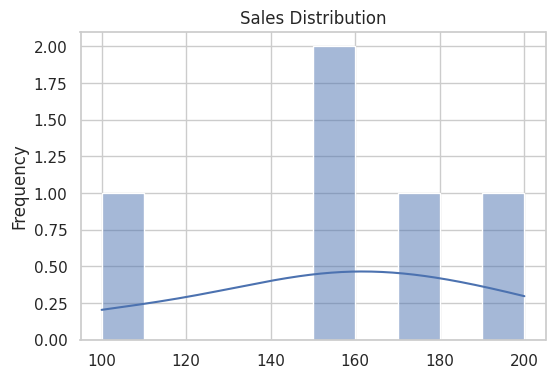


=== Example: Data Validation ===
Invalid numeric values: ['abc']
All dates are valid.
Invalid emails: ['invalid-email']

=== Example: Numeric Outlier Profiling ===

Column: sepal length (cm)
Outliers detected by IQR method: 0
Outliers detected by Z-score method: 0


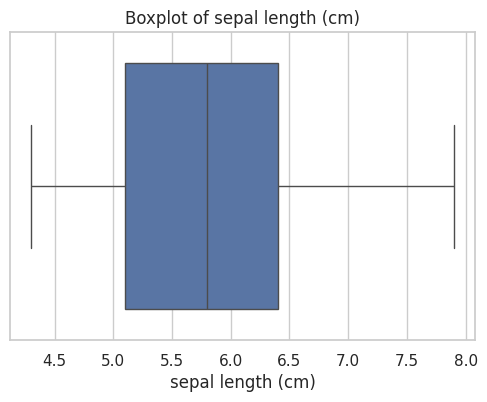


Column: sepal width (cm)
Outliers detected by IQR method: 4
Outliers detected by Z-score method: 1


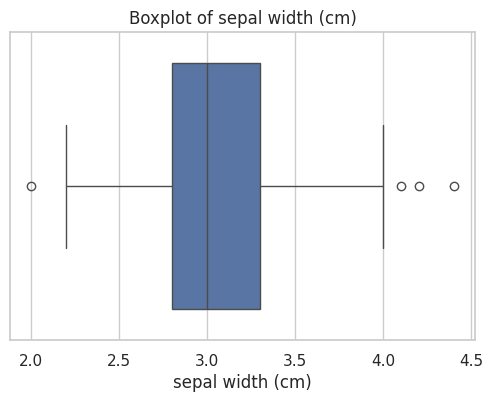


Column: petal length (cm)
Outliers detected by IQR method: 0
Outliers detected by Z-score method: 0


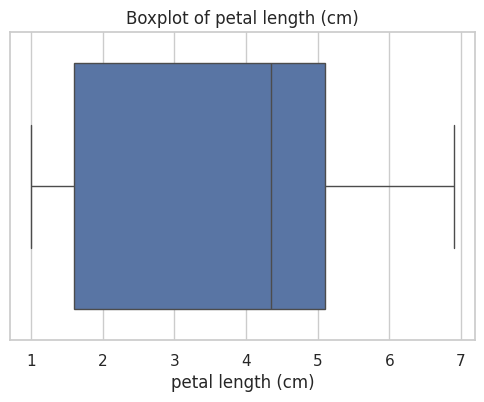


Column: petal width (cm)
Outliers detected by IQR method: 0
Outliers detected by Z-score method: 0


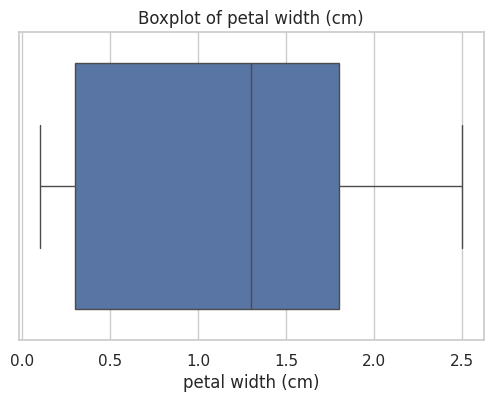

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
from scipy.stats import ks_2samp, zscore

sns.set(style="whitegrid")

# ---------------------------
# Data Quality Handling Functions
# ---------------------------

def handle_missing_data(df, columns=None, fill_method='median'):
    """
    Detect and handle missing data in specified columns.
    fill_method: 'median', 'mean', 'mode', or None (drop rows).
    """
    try:
        cols = columns if columns else df.columns.tolist()
        print("Missing values before handling:")
        print(df[cols].isnull().sum())

        if fill_method == 'median':
            for col in cols:
                if pd.api.types.is_numeric_dtype(df[col]):
                    df[col].fillna(df[col].median(), inplace=True)
        elif fill_method == 'mean':
            for col in cols:
                if pd.api.types.is_numeric_dtype(df[col]):
                    df[col].fillna(df[col].mean(), inplace=True)
        elif fill_method == 'mode':
            for col in cols:
                mode_val = df[col].mode()
                if not mode_val.empty:
                    df[col].fillna(mode_val[0], inplace=True)
        elif fill_method is None:
            df.dropna(subset=cols, inplace=True)
        else:
            print(f"Unknown fill_method '{fill_method}', no filling performed.")

        print("Missing values after handling:")
        print(df[cols].isnull().sum())
        return df
    except Exception as e:
        print(f"Error handling missing data: {e}")
        return df


def remove_duplicates(df, subset=None):
    """
    Detect and remove duplicate rows based on subset of columns.
    """
    try:
        dup_count = df.duplicated(subset=subset).sum()
        print(f"Number of duplicate rows: {dup_count}")
        df_clean = df.drop_duplicates(subset=subset)
        return df_clean
    except Exception as e:
        print(f"Error removing duplicates: {e}")
        return df


def standardize_dates(df, date_col):
    """
    Parse and standardize dates in a column using vectorized pandas function.
    """
    try:
        df[date_col] = pd.to_datetime(df[date_col], infer_datetime_format=True, errors='coerce')
        invalid_dates = df[date_col].isnull().sum()
        if invalid_dates > 0:
            print(f"Warning: {invalid_dates} invalid or missing dates in '{date_col}' after parsing.")
        return df
    except Exception as e:
        print(f"Error standardizing dates: {e}")
        return df


def standardize_phone_numbers(phone_series):
    """
    Normalize phone numbers by removing non-digit characters.
    """
    try:
        normalized = phone_series.str.replace(r'\D', '', regex=True)
        return normalized
    except Exception as e:
        print(f"Error normalizing phone numbers: {e}")
        return phone_series


def standardize_state_abbreviations(address_series):
    """
    Replace common state name variants with standard abbreviations.
    """
    try:
        standardized = address_series.str.replace(r'\bCalif\.?\b', 'CA', regex=True, case=False)
        return standardized
    except Exception as e:
        print(f"Error standardizing state abbreviations: {e}")
        return address_series


# ---------------------------
# Data Drift Detection
# ---------------------------

def detect_data_drift(old_data, new_data, feature, alpha=0.05):
    """
    Detect data drift using summary statistics and Kolmogorov-Smirnov test.
    """
    try:
        old_stats = {
            'mean': np.mean(old_data),
            'median': np.median(old_data),
            'std_dev': np.std(old_data),
            'min': np.min(old_data),
            'max': np.max(old_data)
        }
        new_stats = {
            'mean': np.mean(new_data),
            'median': np.median(new_data),
            'std_dev': np.std(new_data),
            'min': np.min(new_data),
            'max': np.max(new_data)
        }

        ks_stat, p_val = ks_2samp(old_data, new_data)
        drift = p_val < alpha

        print(f"\nData Drift Analysis for '{feature}':")
        print(f"Old Mean: {old_stats['mean']:.3f}, New Mean: {new_stats['mean']:.3f}")
        print(f"KS Statistic: {ks_stat:.3f}, P-value: {p_val:.5f}")
        print("Drift Detected." if drift else "No Significant Drift Detected.")

        plt.figure(figsize=(8,5))
        sns.kdeplot(old_data, label='Old Data', shade=True)
        sns.kdeplot(new_data, label='New Data', shade=True)
        plt.title(f'Distribution Comparison: {feature}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()
        plt.show()

        return {'ks_stat': ks_stat, 'p_value': p_val, 'drift_detected': drift}
    except Exception as e:
        print(f"Error detecting data drift: {e}")
        return None


# ---------------------------
# Data Profiling & Validation
# ---------------------------

def descriptive_statistics(series):
    """
    Calculate mean, median, and mode of a pandas Series.
    """
    try:
        mean = series.mean()
        median = series.median()
        mode = series.mode()
        mode_list = mode.tolist() if not mode.empty else []
        return mean, median, mode_list
    except Exception as e:
        print(f"Error calculating descriptive statistics: {e}")
        return None, None, []


def plot_distribution(series, title, bins=10, kde=True):
    """
    Plot histogram and KDE of a numeric series.
    """
    try:
        plt.figure(figsize=(6,4))
        sns.histplot(series, bins=bins, kde=kde)
        plt.title(title)
        plt.xlabel(series.name)
        plt.ylabel('Frequency')
        plt.show()
    except Exception as e:
        print(f"Error plotting distribution: {e}")


def validate_numeric(series):
    """
    Validate that all values in a series are numeric.
    """
    try:
        coerced = pd.to_numeric(series, errors='coerce')
        invalid = coerced.isnull() & ~series.isnull()
        if invalid.any():
            print(f"Invalid numeric values: {series[invalid].tolist()}")
        else:
            print("All values are valid numerics.")
    except Exception as e:
        print(f"Error validating numeric data: {e}")


def validate_dates(series, date_format='%Y-%m-%d'):
    """
    Validate dates in a series against a specified format.
    """
    try:
        valid = series.apply(lambda x: bool(pd.to_datetime(x, format=date_format, errors='coerce')))
        if not valid.all():
            print(f"Invalid dates: {series[~valid].tolist()}")
        else:
            print("All dates are valid.")
    except Exception as e:
        print(f"Error validating dates: {e}")


def validate_emails(series):
    """
    Validate email addresses using regex.
    """
    try:
        email_regex = r'^[\w\.-]+@[\w\.-]+\.\w+$'
        invalid = series[~series.str.match(email_regex, na=False)]
        if not invalid.empty:
            print(f"Invalid emails: {invalid.tolist()}")
        else:
            print("All emails are valid.")
    except Exception as e:
        print(f"Error validating emails: {e}")


# ---------------------------
# Numeric Outlier Detection
# ---------------------------

def profile_numeric_outliers(df):
    """
    Profile numeric columns and detect outliers using IQR and Z-score.
    """
    try:
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            data = df[col].dropna()
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]
            z_scores = zscore(data)
            outliers_z = data[(np.abs(z_scores) > 3)]

            print(f"\nColumn: {col}")
            print(f"Outliers detected by IQR method: {len(outliers_iqr)}")
            print(f"Outliers detected by Z-score method: {len(outliers_z)}")

            plt.figure(figsize=(6,4))
            sns.boxplot(x=data)
            plt.title(f"Boxplot of {col}")
            plt.show()
    except Exception as e:
        print(f"Error profiling outliers: {e}")


# ---------------------------
# Example Usage
# ---------------------------

def main():
    print("=== Example: Missing Data Handling ===")
    df = pd.DataFrame({
        'email': ['a@example.com', None, 'b@example.com', ''],
        'age': [25, 30, None, 22]
    })
    handle_missing_data(df, fill_method='median')

    print("\n=== Example: Duplicate Removal ===")
    df_dup = pd.DataFrame({
        'id': [1, 2, 2, 3],
        'name': ['Alice', 'Bob', 'Bob', 'Charlie']
    })
    df_clean = remove_duplicates(df_dup, subset=['id', 'name'])
    print(df_clean)

    print("\n=== Example: Date Standardization ===")
    df_dates = pd.DataFrame({
        'date': ['2025-01-01', '01/02/2025', '2025/03/01', 'invalid']
    })
    df_dates = standardize_dates(df_dates, 'date')
    print(df_dates)

    print("\n=== Example: Phone Number Normalization ===")
    phones = pd.Series(['123-456-7890', '(123) 456 7890', '+1 123 456 7890'])
    print(standardize_phone_numbers(phones))

    print("\n=== Example: State Abbreviation Standardization ===")
    addresses = pd.Series(['123 St, Los Angeles, Calif.', '456 St, San Diego, CA'])
    print(standardize_state_abbreviations(addresses))

    print("\n=== Example: Data Drift Detection ===")
    old = np.random.normal(50, 5, 1000)
    new = np.random.normal(52, 5, 1000)
    detect_data_drift(old, new, 'FeatureX')

    print("\n=== Example: Descriptive Statistics ===")
    sales = pd.Series([100, 150, 200, 150, 175])
    mean, median, mode = descriptive_statistics(sales)
    print(f"Sales - Mean: {mean}, Median: {median}, Mode: {mode}")

    print("\n=== Example: Distribution Plot ===")
    plot_distribution(sales, "Sales Distribution")

    print("\n=== Example: Data Validation ===")
    validate_numeric(pd.Series(['10', '20', 'abc', '30']))
    validate_dates(pd.Series(['2025-01-01', '01/02/2025']), '%Y-%m-%d')
    validate_emails(pd.Series(['a@example.com', 'invalid-email', 'b@domain.com']))

    print("\n=== Example: Numeric Outlier Profiling ===")
    from sklearn.datasets import load_iris
    iris = load_iris()
    df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
    profile_numeric_outliers(df_iris)


if __name__ == "__main__":
    main()
